In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [34]:
def trajectory(time):
    a = 3
    return a*time**2

In [35]:
def radar(traj, time, sigma):
    x = traj(time)
    e = np.random.randn()*sigma
    return x+e

In [36]:
def gyroscope(traj, time, sigma):
    dt = 0.01
    dx = traj(time+dt) - traj(time)
    v = dx / dt
    e = np.random.randn()*sigma
    return v+e

In [37]:
X = [radar(trajectory, time, 1000) for time in range(50)]
X = np.array(X)

In [38]:
V = [gyroscope(trajectory, time, 10) for time in range(50)]
V = np.array(V)

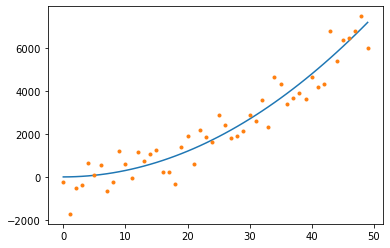

In [39]:
t = np.array(range(50))
plt.plot(t, trajectory(t))
plt.plot(t, X, ".")

In [40]:
def predict(x_prev, sqd_prev, v, sqd_v, dt):
    x = x_prev + v*dt
    sqd = sqd_prev + sqd_v*dt*dt
    return x, sqd

def update(x_pred, sqd_pred, x_obv, sqd_obv):
    w1 = sqd_pred / (sqd_pred + sqd_obv)
    w2 = sqd_obv / (sqd_pred + sqd_obv)
    x = w2*x_pred + w1*x_obv
    sqd = sqd_pred*sqd_obv/(sqd_pred + sqd_obv)
    return x, sqd

def kalman_filter(X, V, sigma_radar=1000, sigma_gyro=10, dt=1):
    x_list = []
    sqd_list = []
    
    x = X[0]
    sqd = sigma_radar**2
    x_list.append(x)
    sqd_list.append(sqd)

    for i in range(1, len(X)):
        v = V[i]
        x_pred, sqd_pred = predict(x, sqd, v, sigma_gyro**2, dt)
        x, sqd = update(x_pred, sqd_pred, X[i], sigma_radar**2)
        x_list.append(x)
        sqd_list.append(sqd)

    return x_list, sqd_list

In [41]:
x_list, sqd_list = kalman_filter(X, V)

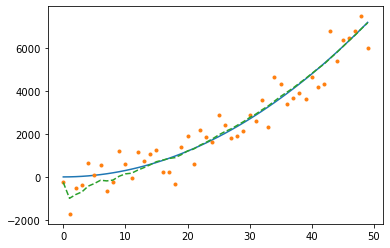

In [42]:
t = np.array(range(50))
plt.plot(t, trajectory(t))
plt.plot(t, X, ".")
plt.plot(t, x_list, "--")